# Tables & Graphs
Agustín Vallejo

July 2021

In this notebook, the data is put into orderly tables and graphs.

### Libraries

In [1]:
"BASIC LIBRARIES"
import numpy as np
import pylab as plt
import plotly.express as px
import pandas as pd

In [2]:
"ASTROPY"
from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
from astropy.constants import c
import astropy.units as u

In [3]:
"PARA IMPORTARD DE IPYNB"
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=472577c109e55b179da3097cbb6c6a9e1f5eb09c5faab04e3d49c695ef5a6734
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


## Google Drive

In [4]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [5]:
!ls "/gdrive/MyDrive/Apophis/Data"

'1. Apophis over Earth.png'   observatory_distances_indexes.csv
'2. Apophis over USA.png'    "Radio coverage Earth's Center.png"
'3. Apophis over Asia.png'   'Radio coverage FAST.png'
 AllRadiotelescopes.xlsx     'Radio coverage Goldstone Radio Telescope.png'
 ephemeris2.xlsx	      subradar_points.csv
 ephemeris3.xlsx	      utils.ipynb
 ephemeris.xlsx		      vectors.xlsx
 observatory_distances.csv


In [6]:
%cd "/gdrive/MyDrive/Apophis/Data"

/gdrive/MyDrive/Apophis/Data


In [7]:
radio =  pd.read_excel("/gdrive/MyDrive/Apophis/Data/AllRadiotelescopes.xlsx",sheet_name='AA')
ephemeris = pd.read_excel("/gdrive/MyDrive/Apophis/Data/ephemeris.xlsx")
vectors = pd.read_excel("/gdrive/MyDrive/Apophis/Data/vectors.xlsx")
print(radio)

                                             Name  ...                                               Link
0                               Arecibo Telescope  ...                                                NaN
1                       Goldstone Radio Telescope  ...  https://en.wikipedia.org/wiki/Goldstone_Deep_S...
2                 Green Bank Interferometer (GBI)  ...                                                NaN
3                      Green Bank Telescope (GBT)  ...                                                NaN
4         Green Bank 140 Foot Telescope (140foot)  ...                                                NaN
5                          Very Large Array (VLA)  ...                                                NaN
6                 Very Long Baseline Array (VLBA)  ...                                                NaN
7                                            FAST  ...                                                NaN
8                                           CD

In [8]:
radio_pairs = [
               (radio.iloc[0],radio.iloc[1]), # Arecibo vs Goldstone
               (radio.iloc[0],radio.iloc[3]), # Arecibo vs GBT
               (radio.iloc[0],radio.iloc[5]), # Arecibo vs VLA
               (radio.iloc[1],radio.iloc[3]), # Goldstone vs GBT
               (radio.iloc[1],radio.iloc[5]), # Goldstone vs VLA
               (radio.iloc[1],radio.iloc[7]), # Goldstone vs FAST
               (radio.iloc[8],radio.iloc[7]), # Camberra vs FAST
               (radio.iloc[9],radio.iloc[7]), # East vs FAST
               (radio.iloc[12],radio.iloc[7]), # GREAT vs FAST
]

In [9]:
import utils

importing Jupyter notebook from utils.ipynb


## Rising and Setting of the Asteroid for Observatory Pairs

In [10]:
# for pair in radio_pairs:
#     obs1, obs2 = pair
#     utils.table2(obs1,obs2,ephemeris)

## Elevation Graphs

In [11]:
for pair in radio_pairs:
    obs1, obs2 = pair
    utils.graph_elevations(obs1,obs2,ephemeris,nticks=11)


FIRST OBSERVATORY: Arecibo Telescope
SECOND OBSERVATORY: Goldstone Radio Telescope


KeyError: ignored

In [16]:
px.line_3d(data_frame=vectors,x='x',y='y',z='z')

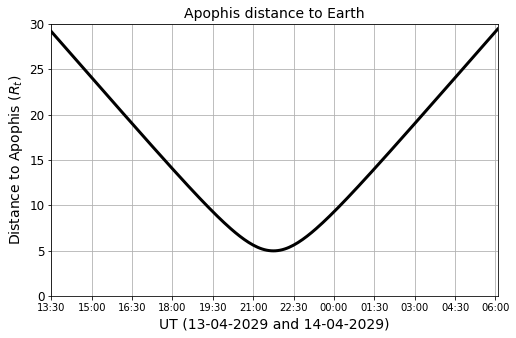

In [13]:
ephemeris['hours'] = 24*(ephemeris['datetime_jd']-ephemeris['datetime_jd'][0])


fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Apophis distance to Earth",size=14)
ax.plot(ephemeris['hours'],ephemeris['delta (Rt)']-1,'k-',lw=3)
ax.set_xlabel("UT (13-04-2029 and 14-04-2029)",size=14)
ax.set_ylabel("Distance to Apophis ($R_t$)",size=14)
xticks = range(0,len(ephemeris),len(ephemeris)//11)
plt.xticks([ephemeris['hours'][i] for i in xticks],
            [ephemeris['datetime_str'][i][-5:] for i in xticks],size=10)
plt.yticks(size=12)
plt.ylim([0,30])
plt.xlim([0,ephemeris['hours'].iloc[-1]])
ax.grid()
plt.show()

In [15]:
fig.savefig('fig1:distances.eps', format='eps')